<a href="https://colab.research.google.com/github/NehaNeha417/loan_prediction/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1199]:
data=pd.read_csv('/content/loan_predction.csv')

In [1200]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1201]:
data.shape

(614, 13)

In [1202]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1203]:
#data.dtpyes

In [1204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1205]:
data.Gender = data.Gender.fillna(data.Gender.ffill())
data.Dependents = data.Dependents.fillna(data.Dependents.ffill())
data.Self_Employed = data.Self_Employed.fillna(data.Self_Employed.ffill())
data.Credit_History = data.Credit_History.fillna(data.Credit_History.ffill())


In [1206]:
data.LoanAmount.fillna(data.LoanAmount.mean(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)


In [1207]:
data=data.dropna()

In [1208]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1209]:
data.shape

(611, 13)

In [1210]:
print(data.Self_Employed.value_counts())
print(data.Dependents.value_counts())
print(data.Property_Area.value_counts())
print(data.Education.value_counts())
print(data.Gender.value_counts())
print(data.Loan_Status.value_counts())
print(data.Married.value_counts())



No     525
Yes     86
Name: Self_Employed, dtype: int64
0     352
2     104
1     104
3+     51
Name: Dependents, dtype: int64
Semiurban    231
Urban        201
Rural        179
Name: Property_Area, dtype: int64
Graduate        477
Not Graduate    134
Name: Education, dtype: int64
Male      498
Female    113
Name: Gender, dtype: int64
Y    419
N    192
Name: Loan_Status, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64


In [1211]:
data.Loan_Status=pd.get_dummies(data.Loan_Status)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0


In [1212]:
x = data.drop(['Loan_Status','Loan_ID'],axis=1)
y = data['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [1213]:
x_train = x_train.drop(columns=['Married','Self_Employed','Education'])
x_train.head()

,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
564,Male,2,8799,0.0,258.0,360.0,0.0,Urban
289,Male,0,9508,0.0,187.0,360.0,1.0,Rural
324,Male,3+,15000,0.0,300.0,360.0,1.0,Rural
133,Male,0,3459,0.0,25.0,120.0,1.0,Semiurban
175,Male,0,3497,1964.0,116.0,360.0,1.0,Rural


In [1214]:
x_train.Gender = pd.get_dummies(x_train.Gender)
#data.Married = pd.get_dummies(data.Married)
#data.Education = pd.get_dummies(data.Education)
#data.Self_Employed = pd.get_dummies(data.Self_Employed)
#data.Dependents = pd.get_dummies(data.Dependents)
#data.Property_Area = pd.get_dummies(data.Property_Area)
#y_train.Loan_Status = pd.get_dummies(y_train.Loan_Status)


In [1215]:
x_train = pd.get_dummies(x_train,columns=['Dependents'])
print(x_train.columns)

Index(['Gender', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


In [1216]:
x_train = pd.get_dummies(x_train,columns=['Property_Area'],prefix='PA')
print(x_train.columns)

Index(['Gender', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'PA_Rural', 'PA_Semiurban',
       'PA_Urban'],
      dtype='object')


In [1217]:
x_test.Gender = pd.get_dummies(x_test.Gender)
x_test = pd.get_dummies(x_test,columns=['Dependents'])
#print(x_train.columns)
#x_test.Married = pd.get_dummies(x_test.Married)
#x_test.Education = pd.get_dummies(x_test.Education)
#x_test.Self_Employed = pd.get_dummies(x_test.Self_Employed)


x_test = pd.get_dummies(x_test,columns=['Property_Area'],prefix='PA')
print(x_test.columns)
x_test = x_test.drop(columns=['Married','Education','Self_Employed'])

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'PA_Rural', 'PA_Semiurban', 'PA_Urban'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1218]:
print(dummy.shape)
x_train.shape


(611, 13)


(488, 13)

In [1219]:
x_train.head(10)

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,PA_Rural,PA_Semiurban,PA_Urban
564,0,8799,0.0,258.0,360.0,0.0,0,0,1,0,0,0,1
289,0,9508,0.0,187.0,360.0,1.0,1,0,0,0,1,0,0
324,0,15000,0.0,300.0,360.0,1.0,0,0,0,1,1,0,0
133,0,3459,0.0,25.0,120.0,1.0,1,0,0,0,0,1,0
175,0,3497,1964.0,116.0,360.0,1.0,1,0,0,0,1,0,0
340,0,2647,1587.0,173.0,360.0,1.0,0,0,0,1,1,0,0
178,0,3750,0.0,116.0,360.0,1.0,0,1,0,0,0,1,0
159,0,4583,5625.0,255.0,360.0,1.0,1,0,0,0,0,1,0
138,0,14999,0.0,242.0,360.0,0.0,1,0,0,0,0,1,0
398,0,3902,1666.0,109.0,360.0,1.0,1,0,0,0,1,0,0


In [1220]:
x_train.shape

(488, 13)

In [1221]:
# from sklearn import preprocessing
# #SS = StandardScaler()
# x_train.LoanAmount = preprocessing.scale(data.LoanAmount)
# #data.Credit_History = preprocessing.scale(data.Credit_History)
# x_train.Loan_Amount_Term = preprocessing.scale(x_train.Loan_Amount_Term)
# x_train.ApplicantIncome = preprocessing.scale(x_train.ApplicantIncome)
# x_train.CoapplicantIncome = preprocessing.scale(x_train.CoapplicantIncome)



In [1222]:
x_train.head()

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,PA_Rural,PA_Semiurban,PA_Urban
564,0,8799,0.0,258.0,360.0,0.0,0,0,1,0,0,0,1
289,0,9508,0.0,187.0,360.0,1.0,1,0,0,0,1,0,0
324,0,15000,0.0,300.0,360.0,1.0,0,0,0,1,1,0,0
133,0,3459,0.0,25.0,120.0,1.0,1,0,0,0,0,1,0
175,0,3497,1964.0,116.0,360.0,1.0,1,0,0,0,1,0,0


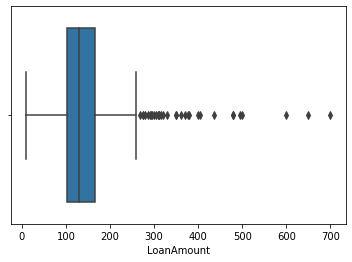

In [1223]:
sns.boxplot(x_train['LoanAmount'])

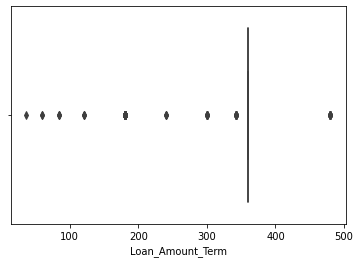

In [1224]:
sns.boxplot(x_train['Loan_Amount_Term'])

In [1225]:
x_train.Loan_Amount_Term.describe()

count    488.000000
mean     342.565574
std       63.618794
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

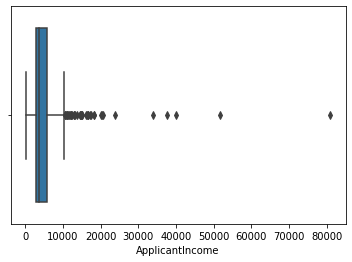

In [1226]:
sns.boxplot(x_train['ApplicantIncome'])

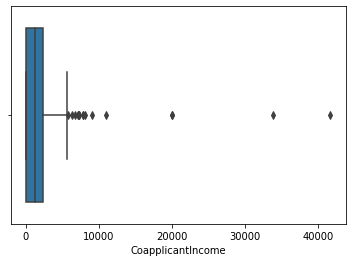

In [1227]:
sns.boxplot(x_train['CoapplicantIncome'])

In [1228]:
#from sklearn import MinMaxScaler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17715d7dd8>,
      dtype=object)

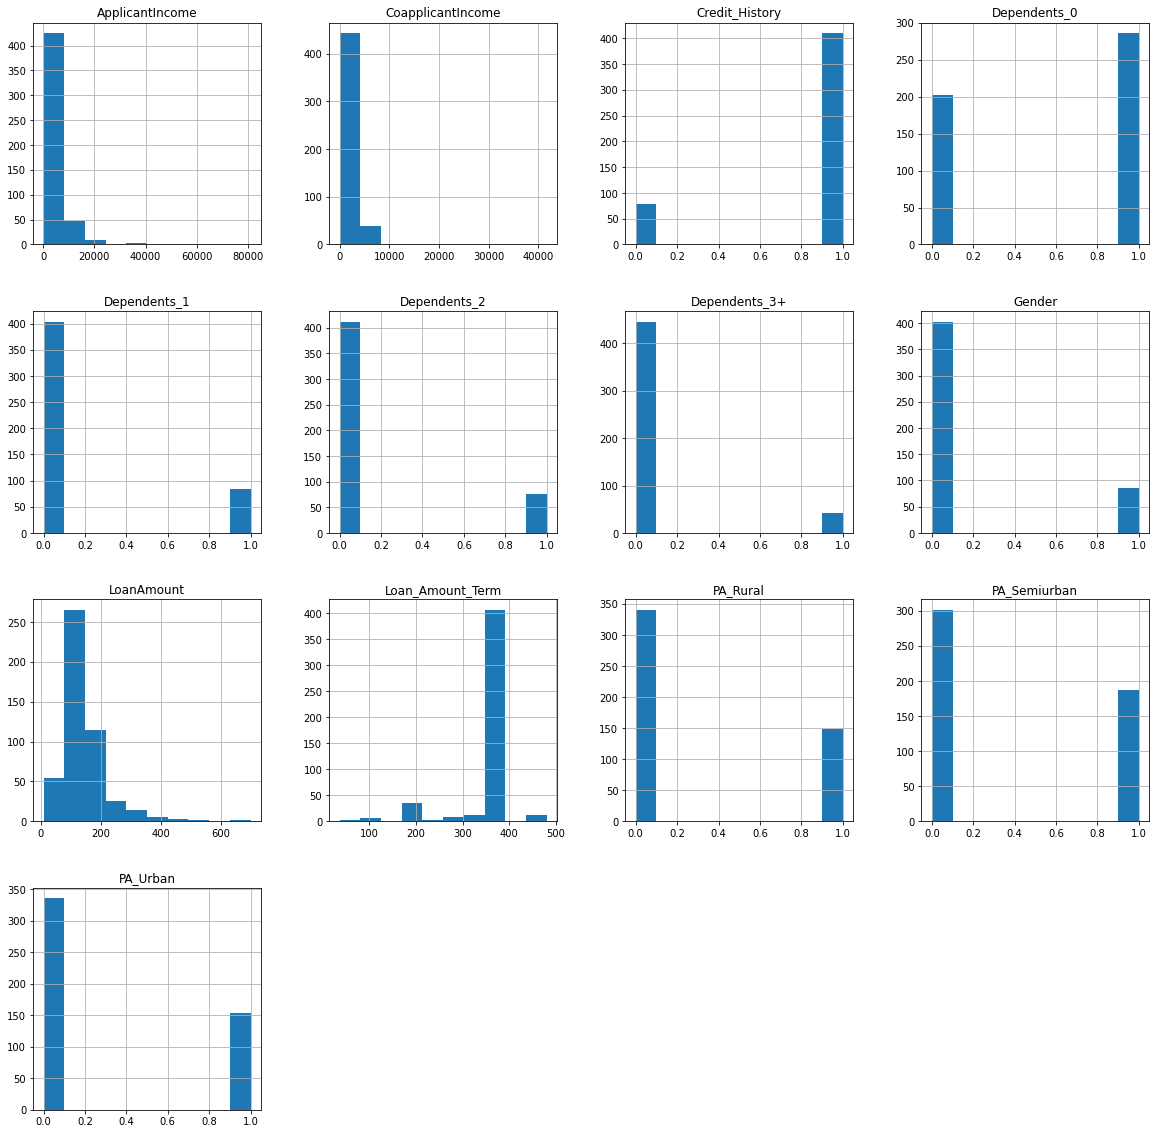

In [1229]:
x_train.hist(figsize=(20,20))

In [1230]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [1231]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

In [1232]:
# x = data.drop(['Loan_Status','Loan_ID'],axis=1)
# y = data['Loan_Status']

In [1233]:
#x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [1234]:
print(x_train.head())
#print(y_train)

     Gender  ApplicantIncome  ...  PA_Semiurban  PA_Urban
564       0             8799  ...             0         1
289       0             9508  ...             0         0
324       0            15000  ...             0         0
133       0             3459  ...             1         0
175       0             3497  ...             0         0

[5 rows x 13 columns]


Accuracy_score= 0.8130081300813008
[[82  6]
 [17 18]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        88
           1       0.75      0.51      0.61        35

    accuracy                           0.81       123
   macro avg       0.79      0.72      0.74       123
weighted avg       0.81      0.81      0.80       123

0.7626623376623376


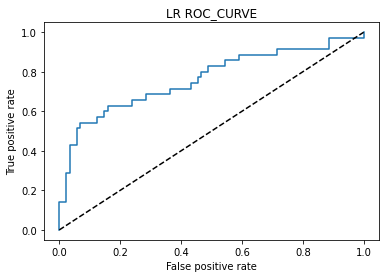

In [1235]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_proba = lr.predict_proba(x_test)
y_proba = y_proba[:,1]
fper,tper,threshold = roc_curve(y_test,y_proba)
acc = accuracy_score(y_test,y_pred)
print('Accuracy_score=',acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LR ROC_CURVE')
plt.show()

In [1236]:
i =[0.0001,0.001,0.01,0.1,10]
test_score = []
for c in i:
  clf = svm.SVC(C=c) #,gamma=0.1)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  test_score.append(acc)
print(test_score)
  


[0.7154471544715447, 0.7154471544715447, 0.7154471544715447, 0.7154471544715447, 0.7154471544715447]


So, C=0.1 gives optimum value.

0.7154471544715447
[[88  0]
 [35  0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.83        88
           1       0.00      0.00      0.00        35

    accuracy                           0.72       123
   macro avg       0.36      0.50      0.42       123
weighted avg       0.51      0.72      0.60       123

0.7626623376623376


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


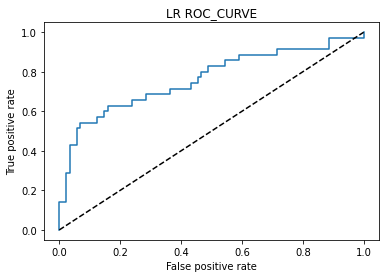

In [1237]:
clf=svm.SVC(C=0.1)          #gamma=0.1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LR ROC_CURVE')
plt.show()


0.8130081300813008
[[83  5]
 [18 17]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        88
           1       0.77      0.49      0.60        35

    accuracy                           0.81       123
   macro avg       0.80      0.71      0.74       123
weighted avg       0.81      0.81      0.80       123

0.7626623376623376


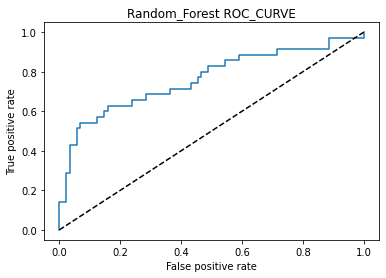

In [1238]:
ran = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5,max_features=2)
ran.fit(x_train,y_train)
y_pred= ran.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random_Forest ROC_CURVE')
plt.show()


In [1239]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
#VC = VotingClassifier()
lr = LogisticRegression(max_iter=50,random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=5,max_features=2,random_state=42)
Classifiers = [('Logistic Regression',lr),('K Nearest Neighbour',knn),('Decision Tree',dt)]
for clf_name,clf in Classifiers:
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  print(acc)
  #print(':s',':.3f'.format(clf_name,accuracy_score(y_test,y_pred)))

0.8211382113821138
0.6097560975609756
0.8130081300813008


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8211382113821138
[[82  6]
 [16 19]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        88
           1       0.76      0.54      0.63        35

    accuracy                           0.82       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.81      0.82      0.81       123

0.7626623376623376


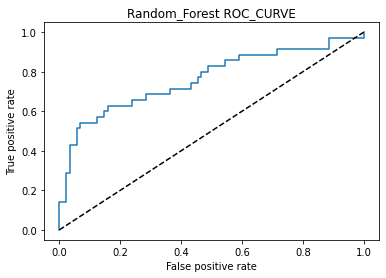

In [1240]:
VC = VotingClassifier(estimators=Classifiers)
VC.fit(x_train,y_train)
y_pred = VC.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random_Forest ROC_CURVE')
plt.show()


In [1241]:
# from sklearn.decomposition import PCA
# features = data['Education','LoanAmount','Self_Employed','PropertyArea','Gender','Married','Dependent','Applicant_Income','CoapplicantIncome','Loan_Amount_Term','Credit_History']
# x = data.loc[:,features].values
# y = data.loc[['Loan_Status']].values
# x = StandardScaler.fit_transform(x)
# pca = PCA(n_components=4)
# prin_comp = pca.fit_transform(x)


In [1242]:
# from sklearn.decomposition import PCA
# pca = PCA(0.99)
# x_train  = pca.fit_transform(x_train)
# x_test = pca.fit_transform(x_test)
# lr = LogisticRegression(max_iter=50,random_state=42)
# lr.fit(x_train,y_train)
# y_pred = lr.predict(x_test)
# acc = accuracy_score(y_test,y_pred)
# print(acc)

In [1243]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(max_depth=5,max_features=2,random_state=42)
n =[5,15,25,50,100,300,500,1000]
test_score=[]
for k in n:
  bc = BaggingClassifier(base_estimator=dt,n_estimators=k,n_jobs=-1)
  bc.fit(x_train,y_train)
  y_pred = bc.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  test_score.append(acc)
print(test_score)



[0.7967479674796748, 0.8048780487804879, 0.8211382113821138, 0.8130081300813008, 0.8211382113821138, 0.8211382113821138, 0.8211382113821138, 0.8211382113821138]


so, n_estimator = 25 gives optimum result